# Data 10/07/23

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")


#Load data from Drive

In [149]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
data_path = '/content/drive/My Drive/DS5500/instagram_creator_data_with_date.csv'


data = pd.read_csv(data_path, encoding = 'latin1')
print(data.head())

        Date  Impressions  From Home  From Hashtags  From Explore  From Other  \
0  12/5/2021         3920       2586           1028           619          56   
1  12/6/2021         5394       2727           1838          1174          78   
2  12/7/2021         4021       2085           1188             0         533   
3  12/8/2021         4528       2700            621           932          73   
4  12/9/2021         2518       1704            255           279          37   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   
3    172        10       7    213              23        8   
4     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best

In [151]:
#data = pd.read_csv("instagram_creator_data_with_date.csv", encoding = 'latin1')
#print(data.head())

In [152]:
data.isnull().sum()

Date              0
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [153]:
data = data.dropna()

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            119 non-null    object
 1   Impressions     119 non-null    int64 
 2   From Home       119 non-null    int64 
 3   From Hashtags   119 non-null    int64 
 4   From Explore    119 non-null    int64 
 5   From Other      119 non-null    int64 
 6   Saves           119 non-null    int64 
 7   Comments        119 non-null    int64 
 8   Shares          119 non-null    int64 
 9   Likes           119 non-null    int64 
 10  Profile Visits  119 non-null    int64 
 11  Follows         119 non-null    int64 
 12  Caption         119 non-null    object
 13  Hashtags        119 non-null    object
dtypes: int64(11), object(3)
memory usage: 13.1+ KB


#Analyzing Instagram Reach



*   Reach from Home



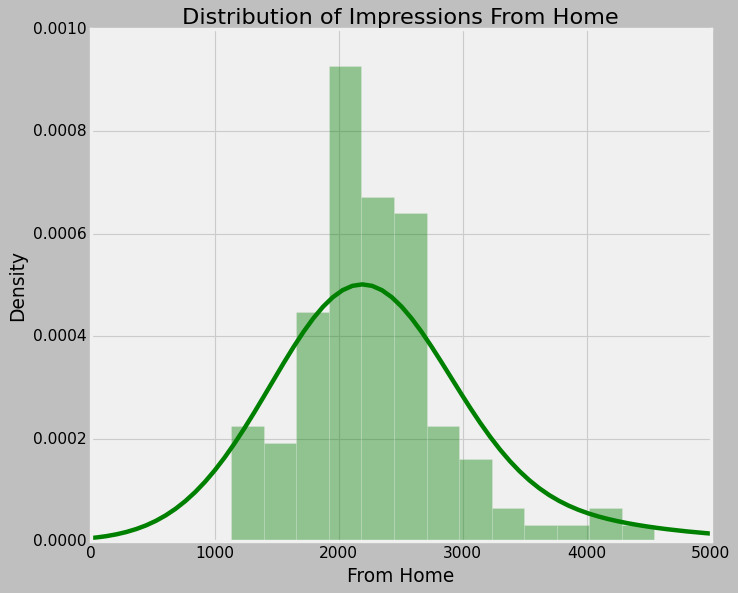

In [155]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'], color='green')
plt.xlim(0, 5000)
plt.show()

*   Reach from Hashtags

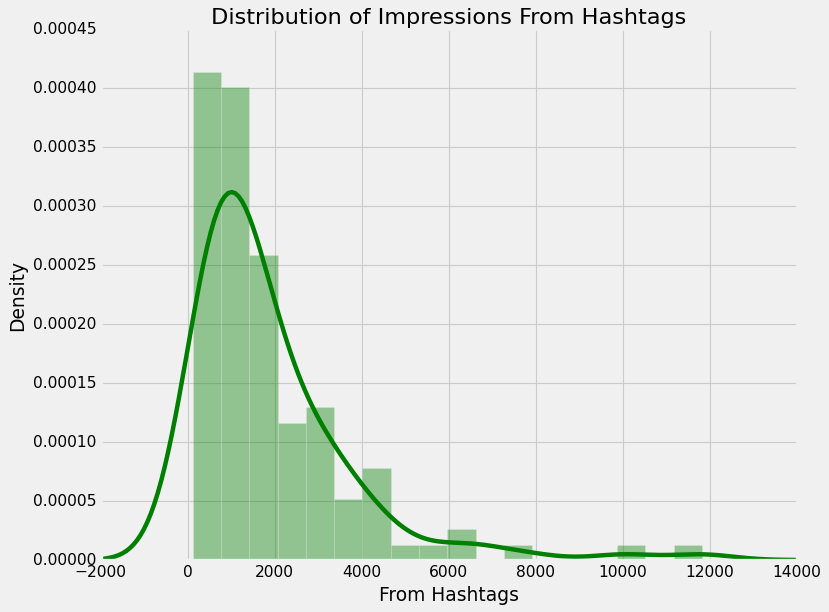

In [156]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'],color='green')
plt.xlim(-2000, 14000)
plt.show()

*   Reach from Explore

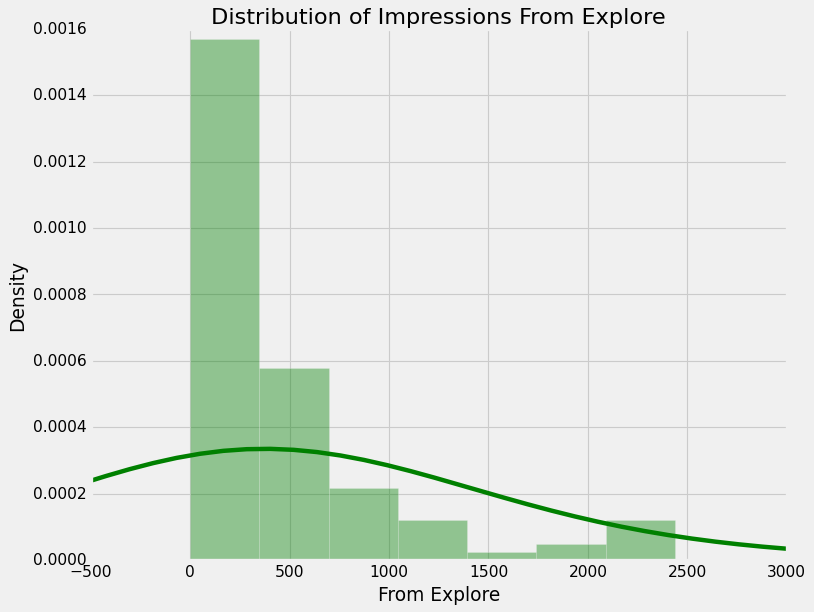

In [157]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'],color='green')
plt.xlim(-500, 3000)
plt.show()



*  Percentage of impressions from various sources



In [158]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

# Define your custom color palette
custom_colors = ['#ff8080', '#95515e', '#9fa15e', '#ffa15e']

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5,
             color_discrete_sequence=custom_colors)
fig.show()



#Analyzing Content


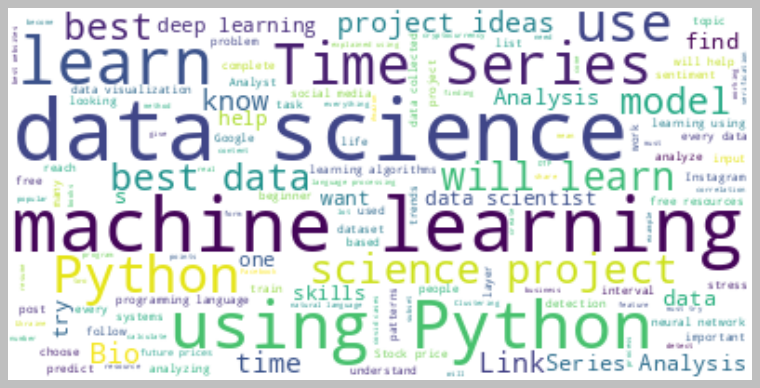

In [159]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



*   Most used Hashtags


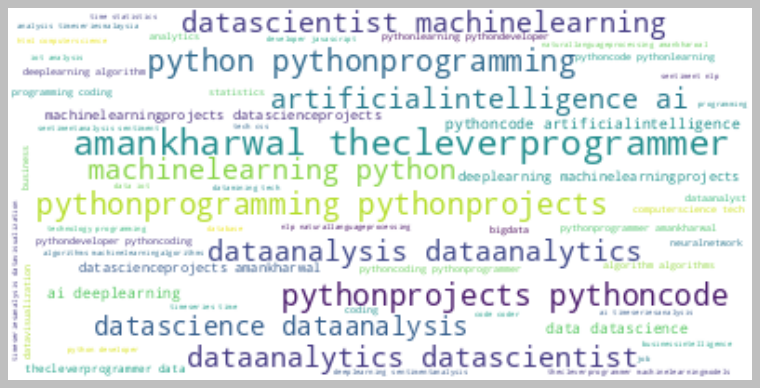

In [160]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Analyzing Relationships

In [161]:
print(max(data["Impressions"]),min(data["Impressions"]))

36919 1941


In [162]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.update_traces(marker=dict(color='green'))
figure.update_layout(plot_bgcolor='rgba(144, 238, 144, 0.6)')
figure.update_xaxes(range=[0, 17000], tickvals=[0, 5000, 10000, 15000])
figure.show()

In [163]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.update_traces(marker=dict(color='green'))
figure.update_layout(plot_bgcolor='rgba(144, 238, 144, 0.6)')
figure.update_xaxes(range=[0, 17000], tickvals=[0, 5000, 10000, 15000])
figure.show()

In [164]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.update_traces(marker=dict(color='green'))
figure.update_layout(plot_bgcolor='rgba(144, 238, 144, 0.6)')
figure.update_xaxes(range=[0, 17000], tickvals=[0, 5000, 10000, 15000])
figure.show()

In [165]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.update_traces(marker=dict(color='green'))
figure.update_layout(plot_bgcolor='rgba(144, 238, 144, 0.6)')
figure.update_xaxes(range=[0, 17000], tickvals=[0, 5000, 10000, 15000])
figure.show()

In [166]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [167]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [168]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.update_traces(marker=dict(color='green'))
figure.update_layout(plot_bgcolor='rgba(144, 238, 144, 0.6)')
figure.update_xaxes(range=[0, 400], tickvals=[0, 100, 200, 300])
figure.show()

#Instagram Reach Prediction Model

In [169]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [170]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7216220726419373

In [171]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10494.61856966])

#Instagram Reach Forecasting

In [172]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [173]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Impressions  From Home  From Hashtags  From Explore  From Other  \
0 2021-12-05         3920       2586           1028           619          56   
1 2021-12-06         5394       2727           1838          1174          78   
2 2021-12-07         4021       2085           1188             0         533   
3 2021-12-08         4528       2700            621           932          73   
4 2021-12-09         2518       1704            255           279          37   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   
3    172        10       7    213              23        8   
4     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best

In [174]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'],
                         y=data['Impressions'],
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

In [175]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data['Date'],
                     y=data['Impressions'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day',
                  xaxis_title='Date',
                  yaxis_title='Instagram Reach')
fig.show()

In [176]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['Impressions'],
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot',
                  yaxis_title='Instagram Reach')
fig.show()

In [177]:
data['Day'] = data['Date'].dt.day_name()
print(data.head())

        Date  Impressions  From Home  From Hashtags  From Explore  From Other  \
0 2021-12-05         3920       2586           1028           619          56   
1 2021-12-06         5394       2727           1838          1174          78   
2 2021-12-07         4021       2085           1188             0         533   
3 2021-12-08         4528       2700            621           932          73   
4 2021-12-09         2518       1704            255           279          37   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   
3    172        10       7    213              23        8   
4     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best

In [178]:
import numpy as np

day_stats = data.groupby('Day')['Impressions'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day         mean  median          std
0     Friday  4462.000000  3606.0  2173.496875
1     Monday  6388.166667  4712.0  4061.361627
2   Saturday  7649.437500  5189.0  7642.711438
3     Sunday  7360.000000  4628.0  7170.447462
4   Thursday  3845.190476  3884.0  1272.520044
5    Tuesday  5550.210526  5058.0  3530.461893
6  Wednesday  3875.272727  3786.0  1175.195736


In [179]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['mean'],
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['median'],
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['std'],
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week',
                  xaxis_title='Day',
                  yaxis_title='Instagram Reach')
fig.show()

In [180]:
data.to_csv('IG_Data.csv', index=False)

In [181]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = data[["Date", "Impressions"]]

result = seasonal_decompose(data['Impressions'],
                            model='multiplicative',
                            period=30)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

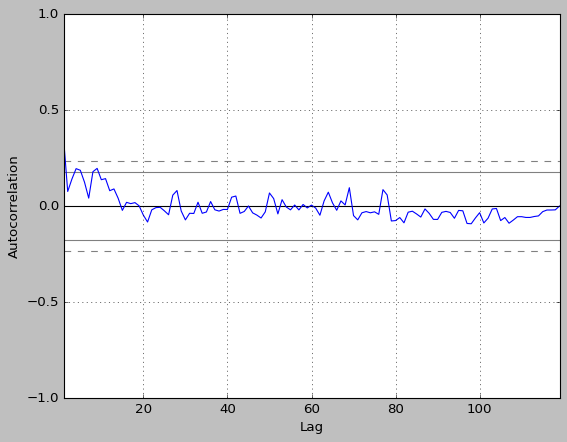

In [182]:
pd.plotting.autocorrelation_plot(data["Impressions"])

Since in the above autocorrelation plot, the curve is moving down after the 4th line of the first boundary, p=4.

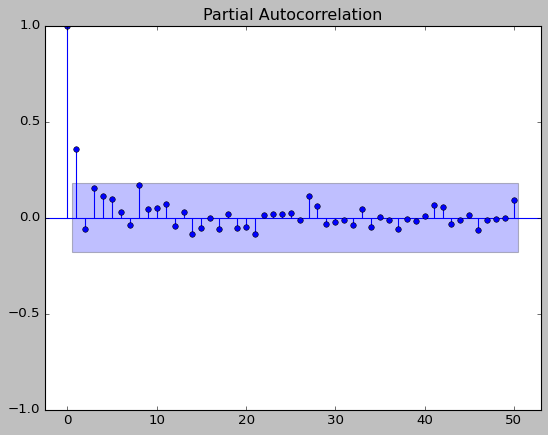

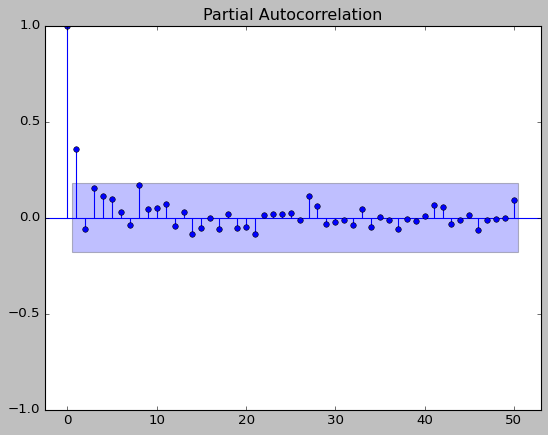

In [183]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Impressions"], lags = 50)

Since in the above partial autocorrelation plot, we can see that only two points are far away from all the points so q=2.

#Training data using ARIMA

In [184]:
train_data=data[:100]
test_data=data[100:]


In [185]:
p, d, q = 4, 1, 2

import statsmodels.api as sm

model = sm.tsa.ARIMA(data['Impressions'], order=(p, d, q))
model=model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            Impressions   No. Observations:                  119
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1149.075
Date:                Mon, 09 Oct 2023   AIC                           2312.150
Time:                        03:41:13   BIC                           2331.544
Sample:                             0   HQIC                          2320.024
                                - 119                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5593      0.461     -1.212      0.225      -1.463       0.345
ar.L2         -1.0049      0.217     -4.640      0.000      -1.429      -0.580
ar.L3         -0.6248      0.159     -3.919      0.0

In [186]:
predictions = model.predict(len(data), len(data)+20)

trace_train = go.Scatter(x=data.index,
                         y=data["Impressions"],
                         mode="lines",
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index,
                        y=predictions,
                        mode="lines",
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions",
                   xaxis_title="Date",
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

#Evaluating ARIMA Model


*  Forecast Bias


In [187]:
# Get the in-sample forecasts from the trained ARIMA model
in_sample_forecasts = model.fittedvalues

# Get the actual values used for training
actual_values = data['Impressions']

# Calculate forecast errors
forecast_errors = actual_values - in_sample_forecasts

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast_errors))

# Calculate Mean Squared Error (MSE)
mse = np.mean(np.square(forecast_errors))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(forecast_errors / actual_values)) * 100

# Calculate Mean Forecast Error (MFE)
mfe = np.mean(forecast_errors)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Forecast Error (MFE):", mfe)

Mean Absolute Error (MAE): 2591.684529350082
Mean Squared Error (MSE): 16647269.439666955
Root Mean Squared Error (RMSE): 4080.1065475875694
Mean Absolute Percentage Error (MAPE): 46.60016234986266
Mean Forecast Error (MFE): 475.11537147474826


#Training data using SARIMA

In [188]:
p, d, q = 4, 1, 2

import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Impressions'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Impressions   No. Observations:                  119
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood               -1040.512
Date:                            Mon, 09 Oct 2023   AIC                           2107.023
Time:                                    03:41:31   BIC                           2141.648
Sample:                                         0   HQIC                          2121.057
                                            - 119                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1696      2.199     -0.077      0.939      -4.479       4.140
ar.L2         -0.1732      0.778   

In [189]:
predictions = model.predict(len(data), len(data)+20)

trace_train = go.Scatter(x=data.index,
                         y=data["Impressions"],
                         mode="lines",
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index,
                        y=predictions,
                        mode="lines",
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions",
                   xaxis_title="Date",
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

#Evaluating SARIMA Model


*  Forecast Bias


In [190]:
# Get the in-sample forecasts from the trained SARIMA model
in_sample_forecasts = model.fittedvalues

# Get the actual values used for training
actual_values = data['Impressions']

# Calculate forecast errors
forecast_errors = actual_values - in_sample_forecasts

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast_errors))

# Calculate Mean Squared Error (MSE)
mse = np.mean(np.square(forecast_errors))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs(forecast_errors / actual_values)) * 100

# Calculate Mean Forecast Error (MFE)
mfe = np.mean(forecast_errors)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Forecast Error (MFE):", mfe)


Mean Absolute Error (MAE): 2591.2085613879635
Mean Squared Error (MSE): 17137201.303031083
Root Mean Squared Error (RMSE): 4139.710292161891
Mean Absolute Percentage Error (MAPE): 47.68068367809363
Mean Forecast Error (MFE): 339.27387415464943
